<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/21%20-%20Sklearn%20%3A%20Model%20Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 21/30 Sklearn : Sélection de Modele

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

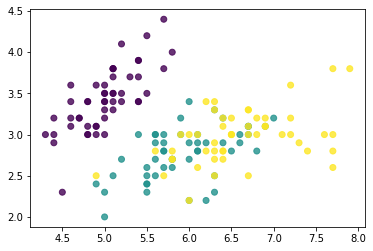

In [28]:
iris = load_iris()
X = iris.data
y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

## 1. Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

- test_size = ... : Definir le pourcentage de données du test

- random_state= ... :  définit simplement une graine sur le générateur aléatoire, de sorte que vos divisions de test de train soient toujours déterministes.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print('Train set:', X_train.shape) 
print('Test set:', X_test.shape)

Train set: (120, 4)
Test set: (30, 4)


Text(0.5, 1.0, 'Test set')

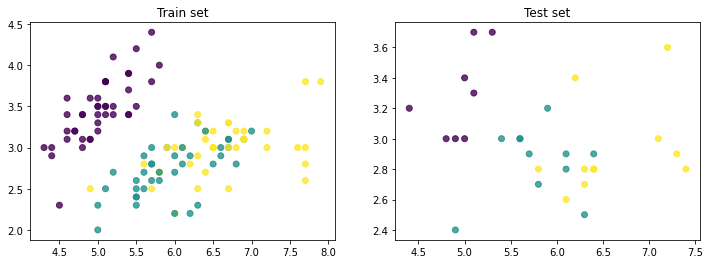

In [32]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1],c=y_test, alpha=0.8)
plt.title('Test set')

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test)) # La performance future du modèle est de 90%

train score: 1.0
test score: 0.9


## 2. Validation Set et Cross Validation

- Cross Validation : consiste à entrainer puis valider notre modèle sur plusieurs decoupes possibles du train set
- Si on decoupe le modèle en 5 parties par exemple, on peut entrainer notre modèle sur les 4 premières parties puis le valider sur la 5e partie
- On repète tout ça pour tous les scénarios possibles
- Enfin, on fait la moyenne des 5 scores que l'on obtient puis en prrend le modèle qui en moyenne a la meilleure performance

In [35]:
from sklearn.model_selection import cross_val_score

- cv= ... : definit le nbre de split (decoupage) que l'on veut ds notre modèle
- scoring = ... : definit le métrique qu'on veut utiliser pour évaluer notre modèle

In [36]:
model = KNeighborsClassifier()
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy') # On obtient 5 scores

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

- Maintenant, on va evaluer differents modèles pour retenir celui qui a la meilleure performance

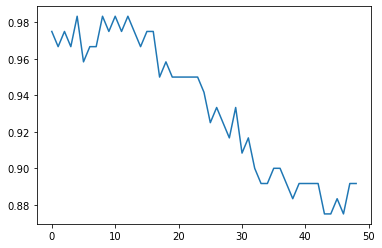

In [37]:
val_score = []
for k in range(1, 50):  # On teste 49 modèles dans un boucle for
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score); # On obtient les meilleures performances qd on aura des voisins aux alentours de 10

## 3. Validation Curve

- validation_curve : permet de faire tout le travail du boucle for precedemment

In [38]:
from sklearn.model_selection import validation_curve

- 'n_neighbors' : C'est le nom de l'hyper paramètre que l'on desire regler
- K : Les differentes valeurs que l'on veut tester pour cet hyper paramètre
- cv : Le nbre de coupages

C:\Users\cleme\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


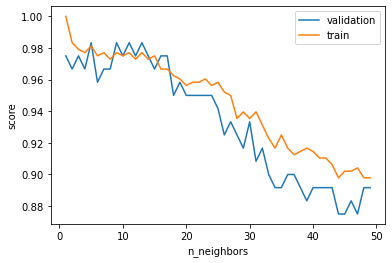

In [39]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train,
                                          'n_neighbors', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score');
plt.xlabel('n_neighbors');
plt.legend();

## 4. GridSearchCV

- GridSearchCV : Permet de trouver le modèle avec les meilleurs hyper paramètres en comparant les differentes performances de chaque combinaison grace à la methode de cross validation

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']} # On crée un dico avec les paramètres qu'on veut tester

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5) # grille avc plusieurs estimateurs

grid.fit(X_train, y_train) # Entrainement u Grid

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [44]:
print(grid.best_score_) # le modèle qui a le meilleir score

0.9833333333333334


In [45]:
print(grid.best_params_) # Les meilleurs paramètres de ce modèle (distance euclidienne avec un nbre de voisins = 5)

{'metric': 'euclidean', 'n_neighbors': 5}


In [47]:
model = grid.best_estimator_ # On sauvegarde le modèle
model.score(X_test, y_test) # On teste sa performance ds la vraie vie

0.9333333333333333

## 5. Confusion Matrix
- Outil de mesure très utile pour évaluer la performance de notre modèle

In [48]:
from sklearn.metrics import confusion_matrix

In [51]:
w

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

## 6. Learning Curve
- Les courbes d'apprentissage montrent l'évolution des performances du modèle en fonction de la quantité de données qu'on lui fournit 

In [52]:
from sklearn.model_selection import learning_curve

- train_sizes= ... : definit le % de données à utiliser pour l'entrainement
- np.linspace : La fonction linspace de numpy qui definit les % de debut (0.1) et de fin (1) ainsi qu'un nbre de lots (10)  
qu'on veut avoir
- N : retourne les differentes quantites des %

[ 9 19 28 38 48 57 67 76 86 96]


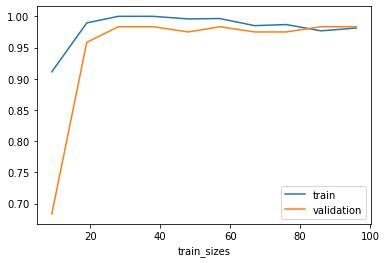

In [55]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train');
plt.plot(N, val_score.mean(axis=1), label='validation');
plt.xlabel('train_sizes');
plt.legend();

### Interpretation du graphique

- En faisant de learning curve de 10% à 100% en traçant du lot, on voit que la performance n'évolue presque plus à partir du moment qu'on a plus de 80 pts dans notre dataset.
- Cela nous montre que le modèle va continuer à stagner. Donc, il est peuprobable d'obtenir de meilleure performance en ayant 100 par exemple